## < min-max 스케일링 기준 상하위 5% 구하기 >
### 주어진 데이터에서 'f5'컬럼을 min-max 스케일 변환한 후, 상위 5%와 하위 5% 값의 합을 구하시오

### - 데이터셋 : basic1.csv
### - 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
### - File -> Editor Type -> Script

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
data = pd.read_csv("/kaggle/input/bigdatacertificationkr/basic1.csv")
data.head(5)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
# EDA
data.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64

## Min-Max Scaling 공식
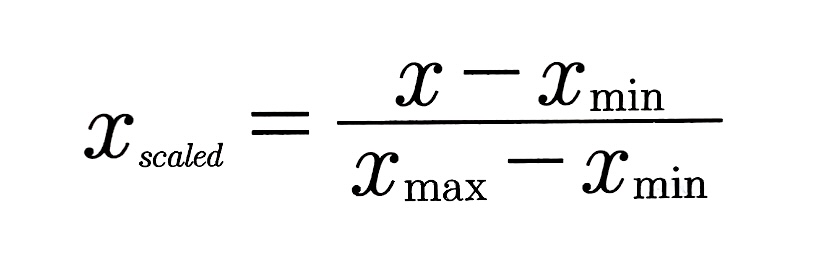!
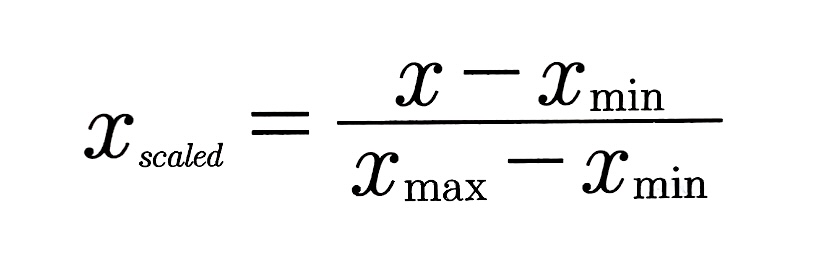

In [3]:
# 'f5'컬럼 min-max scale 방법1 (공식 이용)
min = data['f5'].min()
max = data['f5'].max()
data['f5_scaled_data_1'] = (data['f5'] - min) / (max - min)
data['f5_scaled_data_1']

0     0.919533
1     0.570252
2     0.084129
3     0.483685
4     0.219708
        ...   
95    0.483685
96    0.655395
97    1.000000
98    0.988166
99    0.265279
Name: f5_scaled_data_1, Length: 100, dtype: float64

In [4]:
# 'f5'컬럼 min-max scale 방법2 (라이브러리 이용)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data['f5_scaled_data_2'] = mm.fit_transform(data[['f5']])
data['f5_scaled_data_2']

0     0.919533
1     0.570252
2     0.084129
3     0.483685
4     0.219708
        ...   
95    0.483685
96    0.655395
97    1.000000
98    0.988166
99    0.265279
Name: f5_scaled_data_2, Length: 100, dtype: float64

In [5]:
# 방법 1 VS 방법 2
data.tail(5)

,id,age,city,f1,f2,f3,f4,f5,f5_scaled_data_1,f5_scaled_data_2
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,0.483685,0.483685
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,0.655395,0.655395
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,1.000000,1.000000
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,0.988166,0.988166
99,id100,47.0,경기,53.0,0,vip,ESFP,33.308999,0.265279,0.265279


In [6]:
# 하위 5%, 상위 5% 값 구해서 합기기
# 방법 1
lower_5_1 = data['f5_scaled_data_1'].quantile(0.05)
upper_5_1 = data['f5_scaled_data_1'].quantile(0.95)
print("방법 1:", round(lower_5_1 + upper_5_1,4))

# 방법 2
lower_5_2 = data['f5_scaled_data_2'].quantile(0.05)
upper_5_2 = data['f5_scaled_data_2'].quantile(0.95)
print("방법 2:", round(lower_5_2 + upper_5_2,4))

방법 1: 1.0249
방법 2: 1.0249


## 풀이 (예시)

In [7]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('../input/bigdatacertificationkr/basic1.csv')

# EDA
print(df.head(5))
print(df.isnull().sum())    #결측치 확인


# min-max scale 방법1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['f5_1'] = scaler.fit_transform(df[['f5']])

# min-max scale 방법2
df['f5_2'] = df['f5'].transform(lambda x: ((x - x.min()) / (x.max() - x.min())))


# 방법1과 2 비교
print(df.head())


# 하위 5%, 상위 5% 값 구하기
lower = df['f5_1'].quantile(0.05)
print(lower)

upper = df['f5_1'].quantile(0.95)
print(upper)

print(round(lower + upper,4))

     id   age city    f1  f2   f3    f4         f5
0  id01   2.0   서울   NaN   0  NaN  ENFJ  91.297791
1  id02   9.0   서울  70.0   1  NaN  ENFJ  60.339826
2  id03  27.0   서울  61.0   1  NaN  ISTJ  17.252986
3  id04  75.0   서울   NaN   2  NaN  INFP  52.667078
4  id05  24.0   서울  85.0   2  NaN  ISFJ  29.269869
id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
dtype: int64
     id   age city    f1  f2   f3    f4         f5      f5_1      f5_2
0  id01   2.0   서울   NaN   0  NaN  ENFJ  91.297791  0.919533  0.919533
1  id02   9.0   서울  70.0   1  NaN  ENFJ  60.339826  0.570252  0.570252
2  id03  27.0   서울  61.0   1  NaN  ISTJ  17.252986  0.084129  0.084129
3  id04  75.0   서울   NaN   2  NaN  INFP  52.667078  0.483685  0.483685
4  id05  24.0   서울  85.0   2  NaN  ISFJ  29.269869  0.219708  0.219708
0.03670782406038746
0.9881662742993513
1.0249
